## We vary the capacity of the Bayesian model by changing `hidden_size` parameter, trying to predict the brownian trajectories.

## We hope to see that, as the size of the model grows, it tends to overfit and detects difference between two very similar datasets, both of a brownian particle moving "forward", when we'd expect to see no difference.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
from brownian_datagen import BrownianDatagen, create_dataholder_forward_same_as_backward
from bayesian_varinf import train_fb_n_times, load_learning_curves

In [3]:
def get_save_dir_prefix(hidden_size: int) -> str:
    save_dir_prefix = "20230724_preds/brownian_varinf_discriminate_identical_nonoise/"
    return os.path.join(save_dir_prefix, f"hidden_size={hidden_size:02}/")

hidden_sizes_mesh = (16, 8, 4)

In [4]:
brownian = BrownianDatagen(kBT=0.03, γ=1., k=1., λ_τ=5., τ=10.)
dt = create_dataholder_forward_same_as_backward(brownian, numParticles=50,
                                                rng_seed1=42, rng_seed2=43)

In [5]:
for hidden_size in hidden_sizes_mesh:
    save_dir_prefix = get_save_dir_prefix(hidden_size)
    if not os.path.isdir(save_dir_prefix):
        train_fb_n_times(dt,
            num_runs=100,
            hidden_size=hidden_size,
            num_epochs=4000,
            save_metrics_every_n_epochs=100,
            train_test_split_ratio=None,
            save_dir_prefix=save_dir_prefix,
            torch_device="cuda:0" if torch.cuda.is_available() else None)
    else:
        print(f"Directory '{save_dir_prefix}' exists, assuming the previous results are reusable")

Directory '20230724_preds/brownian_varinf_discriminate_identical_nonoise/hidden_size=16/' exists, assuming the previous results are reusable
Directory '20230724_preds/brownian_varinf_discriminate_identical_nonoise/hidden_size=08/' exists, assuming the previous results are reusable
Directory '20230724_preds/brownian_varinf_discriminate_identical_nonoise/hidden_size=04/' exists, assuming the previous results are reusable


hidden_size=4


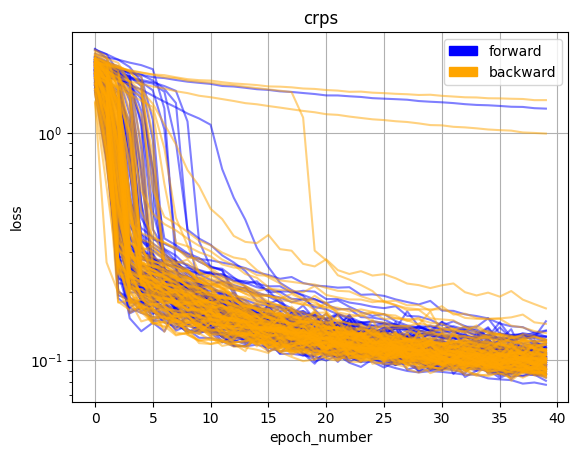

hidden_size=8


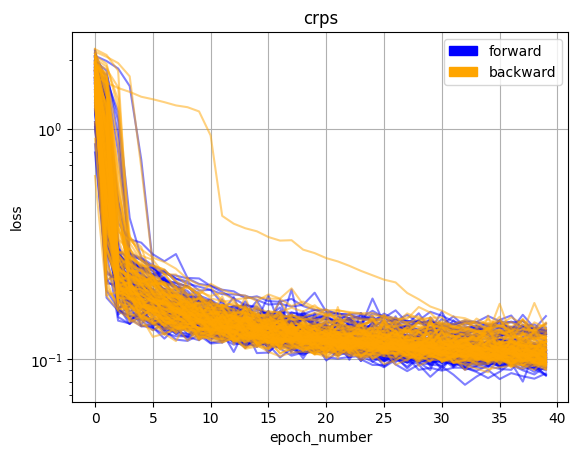

hidden_size=16


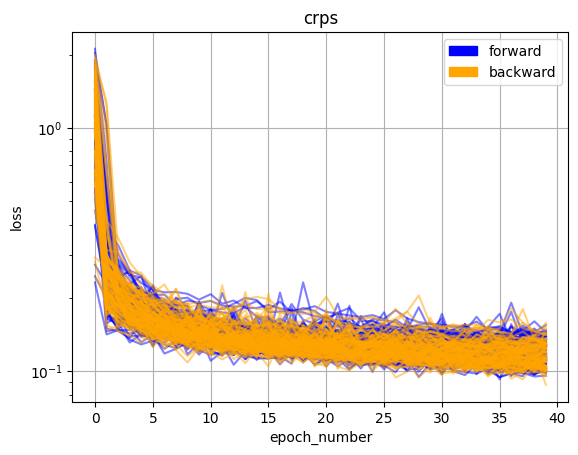

In [6]:
for hidden_size in reversed(hidden_sizes_mesh):
    print(f"hidden_size={hidden_size}")
    save_dir_prefix = get_save_dir_prefix(hidden_size)
    l = load_learning_curves(save_dir_prefix, num_runs=100, alt_metric="crps")
    l.plot_learning_curves()

hidden_size=4


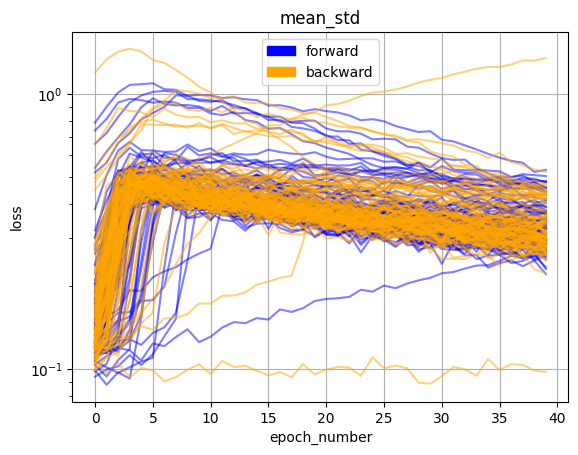

hidden_size=8


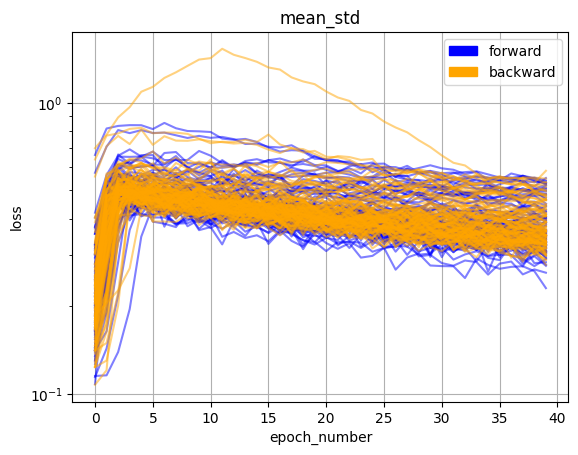

hidden_size=16


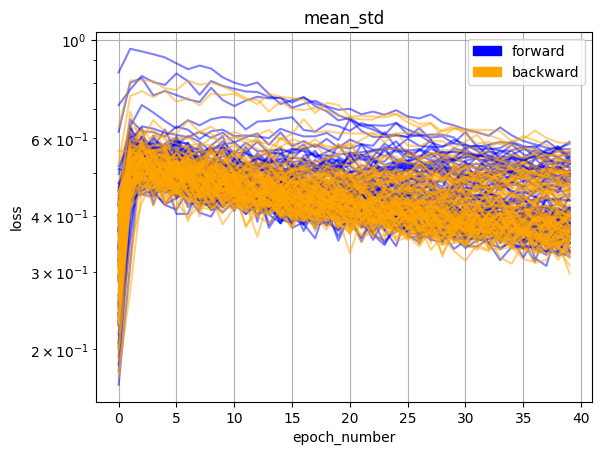

In [7]:
for hidden_size in reversed(hidden_sizes_mesh):
    print(f"hidden_size={hidden_size}")
    save_dir_prefix = get_save_dir_prefix(hidden_size)
    l = load_learning_curves(save_dir_prefix, num_runs=100, alt_metric="mean_std")
    l.plot_learning_curves()

hidden_size=4


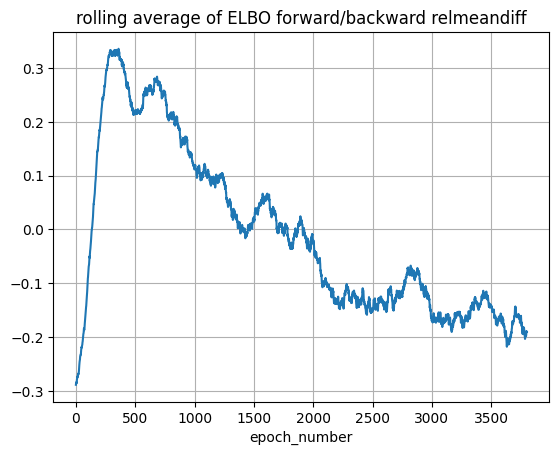

hidden_size=8


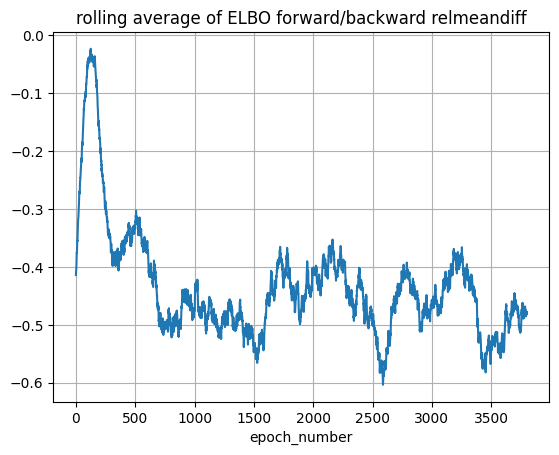

hidden_size=16


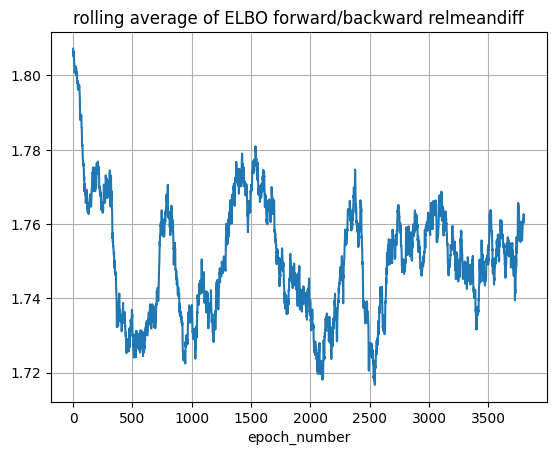

In [8]:
for hidden_size in reversed(hidden_sizes_mesh):
    l = load_learning_curves(get_save_dir_prefix(hidden_size), num_runs=100, alt_metric=None)
    print(f"hidden_size={hidden_size}")
    plt.plot(np.convolve(l.relmeandiff_all(), np.ones(200)/200, mode="valid"))
    plt.title("rolling average of ELBO forward/backward relmeandiff")
    plt.grid()
    plt.xlabel("epoch_number")
    plt.show()

## Same but with much more noise

In [9]:
def get_save_dir_prefix(hidden_size: int) -> str:
    save_dir_prefix = "20230724_preds/brownian_varinf_discriminate_identical_noisy/"
    return os.path.join(save_dir_prefix, f"hidden_size={hidden_size:02}/")

hidden_sizes_mesh = (16, 8, 4)

In [10]:
brownian = BrownianDatagen(kBT=1., γ=1., k=1., λ_τ=5., τ=10.)
dt = create_dataholder_forward_same_as_backward(brownian, numParticles=50,
                                                rng_seed1=42, rng_seed2=43)

In [11]:
for hidden_size in hidden_sizes_mesh:
    save_dir_prefix = get_save_dir_prefix(hidden_size)
    if not os.path.isdir(save_dir_prefix):
        train_fb_n_times(dt,
            num_runs=100,
            hidden_size=hidden_size,
            num_epochs=4000,
            save_metrics_every_n_epochs=100,
            train_test_split_ratio=None,
            save_dir_prefix=save_dir_prefix,
            torch_device="cuda:0" if torch.cuda.is_available() else None)
    else:
        print(f"Directory '{save_dir_prefix}' exists, assuming the previous results are reusable")

Directory '20230724_preds/brownian_varinf_discriminate_identical_noisy/hidden_size=16/' exists, assuming the previous results are reusable
Directory '20230724_preds/brownian_varinf_discriminate_identical_noisy/hidden_size=08/' exists, assuming the previous results are reusable
Directory '20230724_preds/brownian_varinf_discriminate_identical_noisy/hidden_size=04/' exists, assuming the previous results are reusable


hidden_size=4


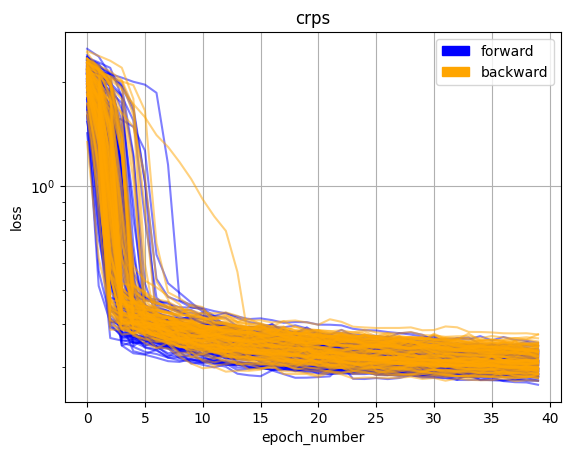

hidden_size=8


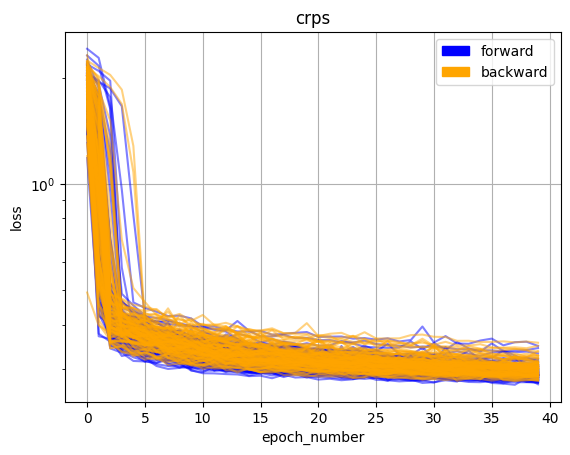

hidden_size=16


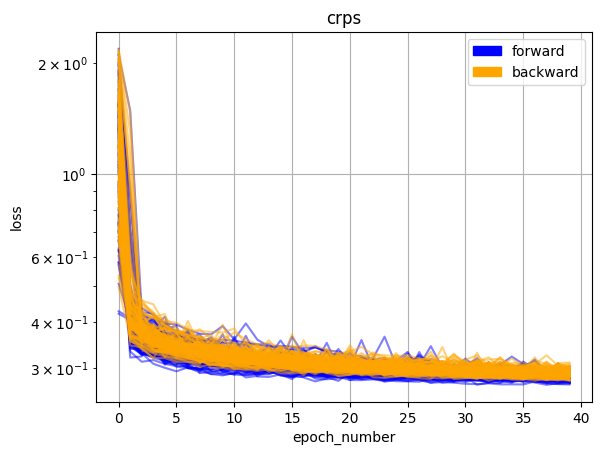

In [12]:
for hidden_size in reversed(hidden_sizes_mesh):
    print(f"hidden_size={hidden_size}")
    save_dir_prefix = get_save_dir_prefix(hidden_size)
    l = load_learning_curves(save_dir_prefix, num_runs=100, alt_metric="crps")
    l.plot_learning_curves()

hidden_size=4


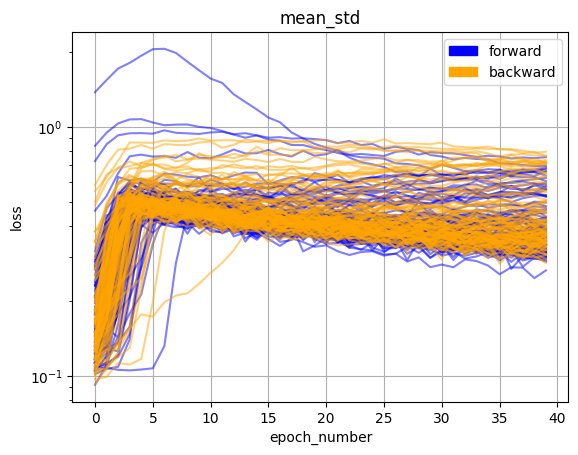

hidden_size=8


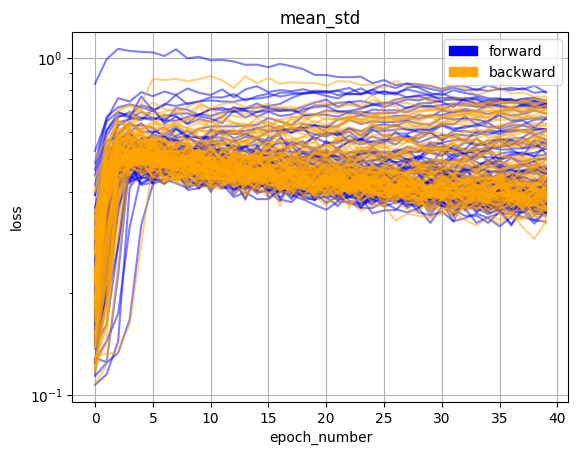

hidden_size=16


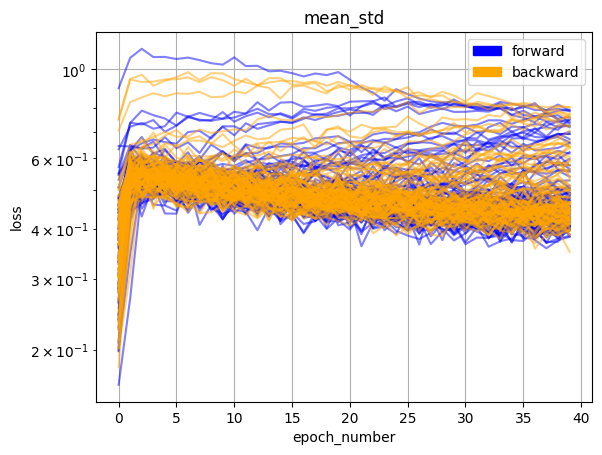

In [13]:
for hidden_size in reversed(hidden_sizes_mesh):
    print(f"hidden_size={hidden_size}")
    save_dir_prefix = get_save_dir_prefix(hidden_size)
    l = load_learning_curves(save_dir_prefix, num_runs=100, alt_metric="mean_std")
    l.plot_learning_curves()

hidden_size=4


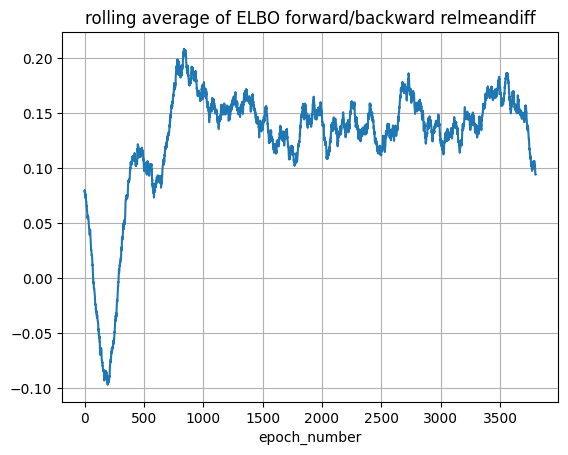

hidden_size=8


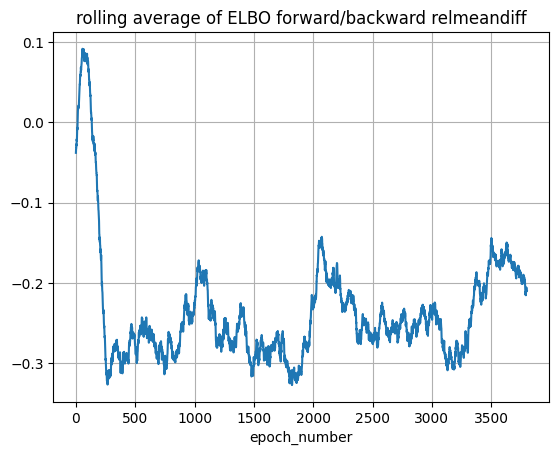

hidden_size=16


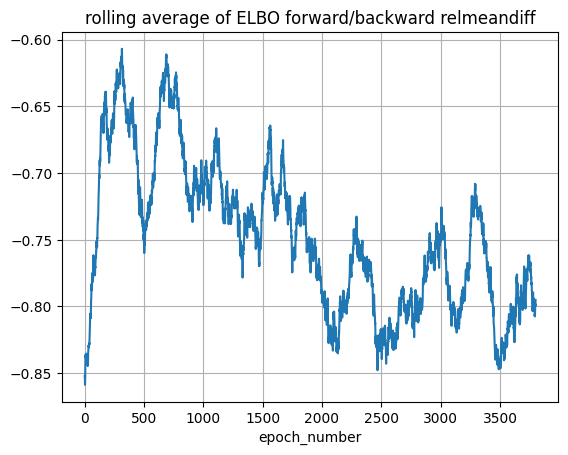

In [14]:
for hidden_size in reversed(hidden_sizes_mesh):
    l = load_learning_curves(get_save_dir_prefix(hidden_size), num_runs=100, alt_metric=None)
    print(f"hidden_size={hidden_size}")
    plt.plot(np.convolve(l.relmeandiff_all(), np.ones(200)/200, mode="valid"))
    plt.title("rolling average of ELBO forward/backward relmeandiff")
    plt.grid()
    plt.xlabel("epoch_number")
    plt.show()

## Conclusions:

- it doesn't seem that the `hidden_size=16` model discriminates the two similar ("forward") datasets 
- however, the difference in ELBO loss becomes more conclusive as `hidden_size` increases to 16